# Assignment 4

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Dropout
from tensorflow.keras.models  import Sequential
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine, load_iris
import matplotlib.pyplot as plt

## Set the random seed for tensorflow to 42

In [ ]:
tf.random.set_seed(42)

## Model 1 (wine model)

In [15]:
X, y = load_wine(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,test_size = 0.1,
                                                    stratify = y, random_state = 42)

### Make one-hot vector for output data (labels)

In [16]:
data_depth = len(set(y_train))
y_train_onehot, y_test_onehot = tf.one_hot(y_train,
                                           depth = data_depth), tf.one_hot(y_test, depth = data_depth)

### Make the model
with softmax output layer

In [17]:
input_shape = X.shape[1]
wine_model = Sequential([
                     Input(input_shape),
                     Dense(128, activation='relu'),  
                     Dropout(0.2),  
                     Dense(128, activation='relu'),   
                     Dropout(0.2),  
                     Dense(data_depth, activation = 'softmax'),  
])

### Compile the model
with Adam optimizer and CategoricalCrossentropy loss function and metrics = ['accuracy']

In [18]:
wine_model.compile(optimizer = 'Adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### Fit the model
with validation_data = (X_test, y_test_onehot)

In [19]:
history = wine_model.fit(X_train, y_train_onehot, validation_data = (X_test, y_test_onehot), epochs = 1000)

Epoch 1/1000
5/5 [==============================] - 1s 44ms/step - loss: 70.2707 - accuracy: 0.3264 - val_loss: 24.1046 - val_accuracy: 0.3333
Epoch 2/1000
5/5 [==============================] - 0s 9ms/step - loss: 41.2348 - accuracy: 0.3752 - val_loss: 2.4065 - val_accuracy: 0.5556
Epoch 3/1000
5/5 [==============================] - 0s 10ms/step - loss: 36.8070 - accuracy: 0.3148 - val_loss: 2.5958 - val_accuracy: 0.6111
Epoch 4/1000
5/5 [==============================] - 0s 10ms/step - loss: 33.8754 - accuracy: 0.3898 - val_loss: 7.5081 - val_accuracy: 0.6111
Epoch 5/1000
5/5 [==============================] - 0s 10ms/step - loss: 28.7031 - accuracy: 0.3741 - val_loss: 8.4836 - val_accuracy: 0.5556
Epoch 6/1000
5/5 [==============================] - 0s 10ms/step - loss: 28.8496 - accuracy: 0.3063 - val_loss: 4.1796 - val_accuracy: 0.5556
Epoch 7/1000
5/5 [==============================] - 0s 9ms/step - loss: 21.3390 - accuracy: 0.4280 - val_loss: 3.3321 - val_accuracy: 0.6111
Epoch 8

### plot the train_loss vs val_loss
 to make sure there is no overfit in our model

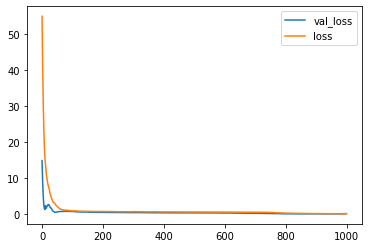

In [20]:
from scipy.signal import savgol_filter #Savgol filter is used to smooth out the data.
plt.plot(savgol_filter(history.history['val_loss'], 21, 3))
plt.plot(savgol_filter(history.history['loss'], 21, 3))
plt.legend(['val_loss', 'loss'])
plt.show()

## Model 2 (iris model)

In [ ]:
X, y = load_iris(return_X_y = True)

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle = True,
                                                    test_size = 0.1, stratify = y, random_state = 42)

### Make one-hot vector

In [ ]:
data_depth = len(set(y_train))
y_train_onehot, y_test_onehot = tf.one_hot(y_train, 
                                           depth = data_depth), tf.one_hot(y_test, depth = data_depth)

### Make the model with softmax activation function for the output layer

In [ ]:
input_shape = X.shape[1]
iris_model = Sequential([
                     Input(input_shape),
                     Dense(128, activation='relu'),  
                     Dropout(0.2),  
                     Dense(128, activation='relu'),   
                     Dropout(0.2),  
                     Dense(data_depth, activation = 'softmax'),  
])

### compile the model
with Adam optimizer, and CategoricalCrossentropy loss function

In [ ]:
iris_model.compile(optimizer = 'Adam', loss = 'CategoricalCrossentropy', metrics = ['accuracy'])

### Fit the model
with validation_data = (X_test, y_test_onehot)

In [ ]:
history = iris_model.fit(X_train, y_train_onehot, validation_data = (X_test, y_test_onehot), epochs = 300)

Epoch 1/300
5/5 [==============================] - 1s 45ms/step - loss: 1.2891 - accuracy: 0.2130 - val_loss: 0.9749 - val_accuracy: 0.3333
Epoch 2/300
5/5 [==============================] - 0s 10ms/step - loss: 1.0095 - accuracy: 0.4391 - val_loss: 0.8259 - val_accuracy: 0.8667
Epoch 3/300
5/5 [==============================] - 0s 10ms/step - loss: 0.9021 - accuracy: 0.5572 - val_loss: 0.6963 - val_accuracy: 0.7333
Epoch 4/300
5/5 [==============================] - 0s 10ms/step - loss: 0.7973 - accuracy: 0.6279 - val_loss: 0.5846 - val_accuracy: 1.0000
Epoch 5/300
5/5 [==============================] - 0s 10ms/step - loss: 0.6455 - accuracy: 0.7030 - val_loss: 0.5046 - val_accuracy: 0.8667
Epoch 6/300
5/5 [==============================] - 0s 10ms/step - loss: 0.5971 - accuracy: 0.7078 - val_loss: 0.4522 - val_accuracy: 0.8667
Epoch 7/300
5/5 [==============================] - 0s 10ms/step - loss: 0.5162 - accuracy: 0.7979 - val_loss: 0.3989 - val_accuracy: 1.0000
Epoch 8/300
5/5 [===

### plot the train_loss vs val_loss
 to make sure there is no overfit in our model

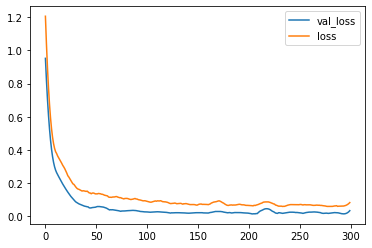

In [ ]:
plt.plot(savgol_filter(history.history['val_loss'], 21, 3))
plt.plot(savgol_filter(history.history['loss'], 21, 3))
plt.legend(['val_loss', 'loss'])
plt.show()